# For cryogenic target cross-sections  

In [1]:
import uproot
import numpy as np
import time
import matplotlib.pyplot as plt
import ROOT as r
from scipy.interpolate import griddata

Welcome to JupyROOT 6.28/04


\begin{equation}
    \sigma^{Born}_{data} = \frac{Y_{data}}{Y_{MC}} \cdot \sigma^{Born}_{MC}
\end{equation}

bin_eprime_high 6.220000000000001
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
i 0
csb for C12 a_pow 1.766 b_pow -2.185
CSB for C12
len(csb_contents_2p42) 32
length of modified 32
Average charge symmetric background electrons for 2.42 GeV 0.03049772769896856
Average charge symmetric background electrons for 2.71 GeV 0.016408501354183255
Average charge symmetric background electrons for 3.04 GeV 0.007922012120626879
Average charge symmetric background electrons for 3.4 GeV 0.003684594727966054
Average charge symmetric background electrons for 3.81 GeV 0.0015385941304010694
Average charge symmetric background electrons for 4.27 GeV 0.0005708751959905359
Average charge s

/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:444: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_2p42 = eprime_bin_contents_2p42/bin_counts_eprime_2p42
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:445: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_2p71 = eprime_bin_contents_2p71/bin_counts_eprime_2p71
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:446: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_3p04 = eprime_bin_contents_3p04/bin_counts_eprime_3p04
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:447: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_3p4 = eprime_bin_contents_3p4/bin_counts_eprime_3p4
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:448: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_3p81 = eprime_bin_contents_3p81/b

i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
i 10
csb for LD2 a_pow 2.763 b_pow -2.423
CSB for LD2
len(csb_contents_2p42) 32
length of modified 32
Average charge symmetric background electrons for 2.42 GeV 0.04680053771524261
Average charge symmetric background electrons for 2.71 GeV 0.023558785722856114
Average charge symmetric background electrons for 3.04 GeV 0.010518194097282324
Average charge symmetric background electrons for 3.4 GeV 0.00450741690891641
Average charge symmetric background electrons for 3.81 GeV 0.0017141847723769457
Average charge symmetric background electrons for 4.27 GeV 0.0005721368124428498
Average charge symmetric background elect

/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:827: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_2p42 = eprime_bin_contents_2p42/bin_counts_eprime_2p42
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:828: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_2p71 = eprime_bin_contents_2p71/bin_counts_eprime_2p71
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:829: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_3p04 = eprime_bin_contents_3p04/bin_counts_eprime_3p04
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:830: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_3p4 = eprime_bin_contents_3p4/bin_counts_eprime_3p4
/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_8977/3105680190.py:831: RuntimeWarning: invalid value encountered in divide
  ratio_eprime_3p81 = eprime_bin_contents_3p81/b

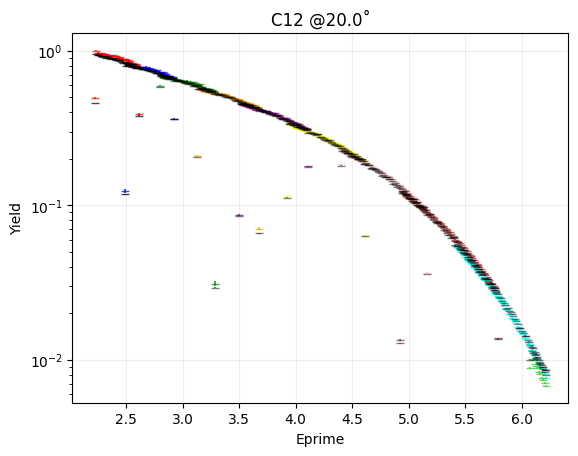

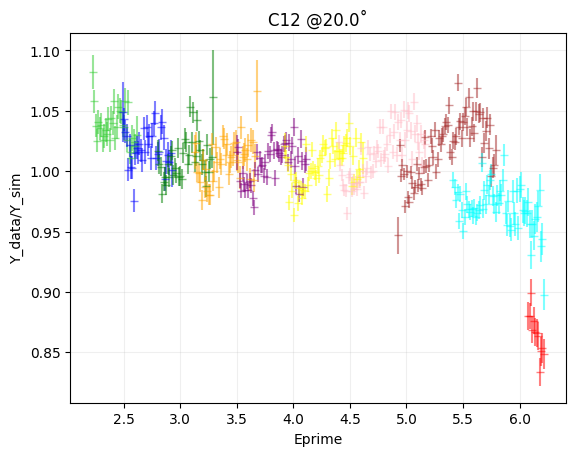

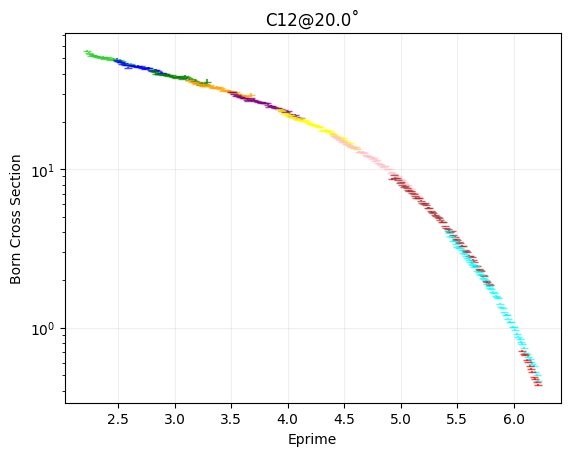

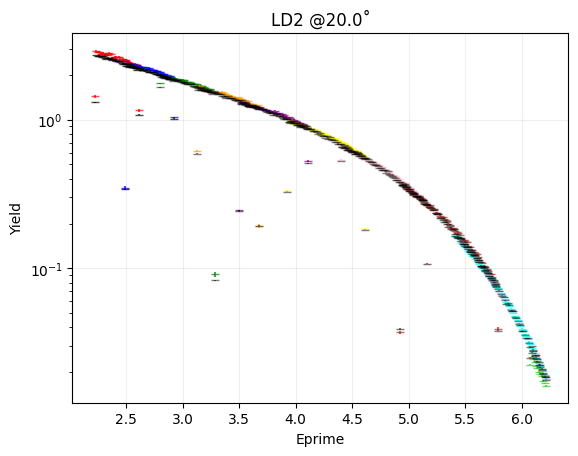

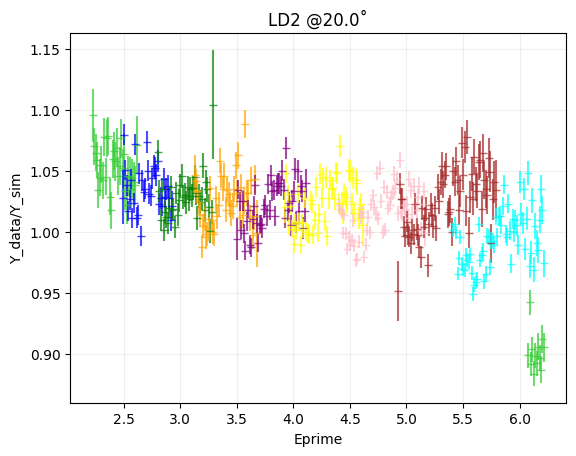

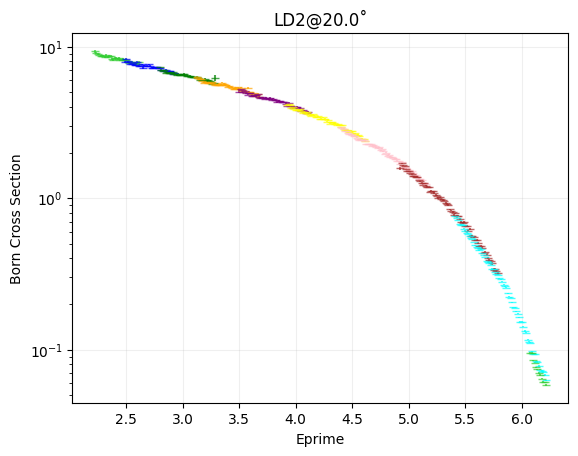

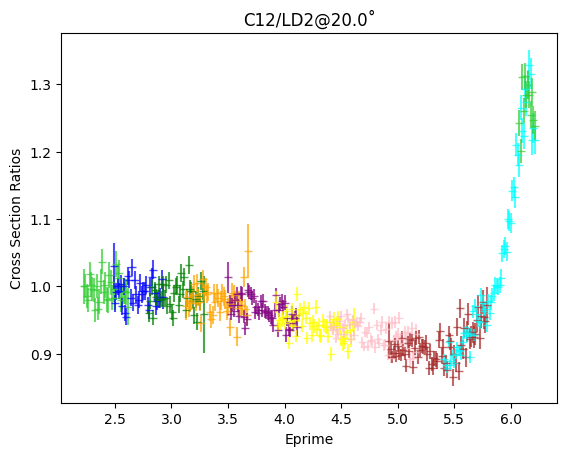

In [32]:
start_time = time.time()
r.EnableImplicitMT()
folder = 'csb'

ntg = 'C12' #What is the nuclei in numerator?
dtg = 'LD2' #What is the nuclei in denominator?
dang = 20.0 #What is your desired angle?
dmom = [2.42, 2.71, 3.04, 3.40, 3.81, 4.27, 4.78, 5.36, 5.878, 6.6] #What are your desired central momenta(just the magnitude)
# dmom = [2.42]
cafe_report_path = '/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/reportfiles/'
tinfo_path = '/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/HMS_runlist copy.txt'
datafile_path = '/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/ROOTfiles/'
bin_num = 32 * len(dmom) #half percent bins according to the resolution of the spectrometer(-8% to 8%)
bin_eprime_low = 2.22
bin_eprime_high = bin_eprime_low + 0.0125 * bin_num
print("bin_eprime_high", bin_eprime_high)
LD2_dict = {
    6.6: [4662, 4663, 4664, 4665, 4666],
    5.878: [4780, 4781, 4782, 4783, 4784, 4785],
    5.36: [4786, 4787],
    4.78: [4862, 4863],
    4.27: [4864],
    3.81: [4915],
    3.4: [4918],
    3.04: [4956, 4957],
    2.71: [4958, 4962],
    2.42: [5019, 5020]
}
C12_dict = {
    6.6: [4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697],
    5.878: [4755, 4757, 4758, 4759, 4760, 4761],
    5.36: [4803, 4805, 4806, 4808, 4809, 4810],
    4.78: [4846, 4847, 4848, 4849],
    4.27: [4875, 4876],
    3.81: [4901, 4902, 4903, 4904],
    3.4: [4925, 4926],
    3.04: [4947, 4949],
    2.71: [4969, 4970],
    2.42: [5004, 5005, 5006]
}
target_dicts = {
    'C12': C12_dict,
    'LD2': LD2_dict
}

def csb(eprime, tg):
    if dang == 20.0:
        # print("20 degrees")
        targ = ['C12', 'Ca40', 'Ag', 'Al', 'Au', 'Be', 'B10', 'B11', 'Ca48', 'Cu', 'LD2', 'Dummy', 'Fe54', 'He3', 'He4', 'Li6', 'Li7', 'Ni58', 'Ni64', 'Sn*', 'Th', 'Ti']
        a_list = [1.766, 2.129, 1.904, 1.717, 1.789, 1.974, 1.798, 1.833, 2.218, 2.157, 2.763, 1.642, 1.723, 2.338, 2.307, 1.741, 1.845, 1.415, 1.423, None, 1.814, 1.600]
        b_list = [-2.185, -2.064, -1.951, -2.130, -1.938, -2.231, -2.206, -2.218, -2.036, -1.964, -2.423, -2.130, -2.072, -2.348, -2.278, -2.247, -2.311, -2.034, -2.037, None, -1.927, -2.103]
    if dang == 26.0:
        targ = ['C12', 'Ca40', 'LD2', 'Dummy']
        a_list = [2.244, 2.355, 3.324, 2.079]
        b_list = [-2.637, -2.338, -3.045, -2.538]
    if dang == 35.0:
        targ = ["C12", "Ca40", "Ca48", "LD2", "Dummy", "He3", "He4"]
        a_list = [2.286, 1.977, 1.917, 3.091, 2.126, 2.674, 2.627]
        b_list = [-2.935, -2.275, -2.183, -3.451, -2.778, -3.246, -3.120]
    if tg in targ:
        i = targ.index(tg)
        print("i", i)
        a_pow = a_list[i]
        b_pow = b_list[i]
    else:
        print("Target not found")
    print(f"csb for {tg}", "a_pow", a_pow, "b_pow", b_pow)
    csb = np.exp(a_pow + b_pow*eprime)
    return csb

# Function to read the text file into an array
def ImportRadcor(filename):
    vectors = [[] for _ in range(13)]
    with open(filename, 'r') as infile:
        for line in infile:
            if line.startswith(' *'):
                continue
            values = line.split()
            if len(values) == 13:
                for i, val in enumerate(values):
                    vectors[i].append(float(val))
    return [np.array(v) for v in vectors]

#Function to calculate scaling factors for data
def read_report(momentum, tg):
    q = j = 0
    ls = '2'
    sf = []
    target_dict = target_dicts.get(tg)
    # if target_dict:
    #     print(f"Target dictionary found for {tg}")
    for run in target_dict[momentum]:
        cafe_report = open(cafe_report_path+"replay_hms_production_%d_-1.report"%run)
        for line in cafe_report:
            if "BCM4A Beam Cut Charge" in line:
                c2 = float((line.split(":")[1]).strip()[:-2])
            if "_factor" in line:
                f1 = float((line.split("=")[-1].strip()))
                if f1 != -1.0 :
                    #print("Prescale factor:",f1)
                    ll = f1
                    f2 = str((line.split(["="][0])))
                    ls = f2[4]
                    #print("Active trigger",f2[4])
                    continue
            if "Ps%s HMS Computer Live Time"%ls in line:
                clt = float((line.split(":")[1]).strip()[:-3])
            if "BCM4A Beam Cut Current" in line:
                cc = float((line.split(":")[1]).strip()[:-2])
            if "E SING FID" in line:
                fid = float((line.split(":")[1]).strip()[:-11])
                c2o = c2 * (1 + 0.37/cc) #Beam current offset correction
                pro = c2o * clt * 0.01
                pro2 = pro * fid #Denominator for the CNY
                sf.append(pro2/ll) #Saving the scaling factors into a list
                j=j+1
                q=q+1
    tsf = sum(sf)
    p_scale = 1/tsf
    return p_scale

def koshish5():
    #Kinematic variables
    ts = dang #Spectrometer angle
    Z, A = 6, 12  #Target
    density = 1.0 #Target density g/cm3
    thick = 0.574 #g/cm2. From Cameron's target sheet column 'R'('H' for cryo targets)
    ep_min = {}
    ep_max = {}
    #Constants
    Ei, Mp = 10.54, 0.93825 #Beam energy and proton mass in GeV
    N_A, Q_E = 6.02e+23, 1.60e-19 #Avogadro's number and charge in 1 electron
    al_den, length = 2.699, 10. #Density of aluminum can and length of can
    dpp_up, dpp_down = 15.0, -15.0 #Momentum acceptance upper and lower limit
    cos_ts = np.cos(np.deg2rad(ts))
    sin_ts = np.sin(np.deg2rad(ts))
    for momentum in dmom:
        ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
        ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
        phi_up, phi_down, theta_up, theta_down = 110.0, -110.0, 65.0, -65.0 #mrad
        domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  #diff solid angle in sr
        sim_charge = 1.
        wall_exit, wall_ent = 0.0168, 0.02024 #in cm
        dum_thick_exit, dum_thick_ent = 0.1816, 0.1815 #g/cm2
        hyd_thick_ent = al_den * wall_ent #g/cm2
        hyd_thick_exit = al_den * wall_exit #g/cm2
        lumin = thick * sim_charge / A * N_A / Q_E * 1e-39
        ratio_ent = hyd_thick_ent / dum_thick_ent
        ratio_exit = hyd_thick_exit / dum_thick_exit

    ######################################################################      DATA WORK FOR NTG     ########################################################################################
    
    #Define the data cuts
    data_cut = "-8 < H_gtr_dp && H_gtr_dp < 8 && H_cal_etottracknorm > 0.7 && abs(H_gtr_ph) < 0.032 && abs(H_gtr_th) < 0.085 && H_cer_npeSum > 2 && H_bcm_CurrentFlag == 1"

    def root_hist_to_numpy(root_hist):
        bin_edges = np.array([root_hist.GetXaxis().GetBinLowEdge(i) for i in range(1, root_hist.GetNbinsX() + 2)])
        bin_contents = np.array([root_hist.GetBinContent(i) for i in range(1, root_hist.GetNbinsX() + 1)])
        bin_errors = np.array([root_hist.GetBinError(i) for i in range(1, root_hist.GetNbinsX() + 1)])
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        return bin_centers, bin_contents, bin_errors

    histograms = {}
    for momentum in dmom:
        # print("momentum", momentum)
        #Create a TChain
        ch = r.TChain("T")

        for run in C12_dict[momentum]:
            ch.Add(f'/Users/AbSir/Desktop/MC_Yield/ROOTfiles/HMS_{run}_skim.root')
        df = r.RDataFrame(ch)  #Create an RDataFrame from the TChain
        prod_scale = read_report(momentum, ntg)
        #Apply the cuts to the chained dataframe
        hc = df.Filter(data_cut)\
               .Define("Eprime", f"{momentum}*(1 + 0.01*H_gtr_dp)")
        
        #Create the histograms from the dataframe
        heprime = hc.Histo1D(("Eprime", "Eprime", bin_num, bin_eprime_low, bin_eprime_high), "Eprime")
        heprime.Sumw2()
        hdeltadat = hc.Histo1D(("Delta", "Delta", bin_num, -8.0, 8.0), "H_gtr_dp")
        hdeltadat.Sumw2()
        heprime.Scale(prod_scale)
        heprime_th = heprime.GetValue()
        histograms[momentum] = heprime_th.Clone()
    
    #fig refers to the entire canvas on which plots are drawn. ax refers to a single plot/subplot
    fig, ax = plt.subplots()
    eprime_bin_centers_2p42, eprime_bin_contents_2p42, eprime_bin_errors_2p42 = root_hist_to_numpy(histograms[2.42])
    eprime_bin_centers_2p71, eprime_bin_contents_2p71, eprime_bin_errors_2p71 = root_hist_to_numpy(histograms[2.71])
    eprime_bin_centers_3p04, eprime_bin_contents_3p04, eprime_bin_errors_3p04 = root_hist_to_numpy(histograms[3.04])
    eprime_bin_centers_3p4, eprime_bin_contents_3p4, eprime_bin_errors_3p4 = root_hist_to_numpy(histograms[3.4])
    eprime_bin_centers_3p81, eprime_bin_contents_3p81, eprime_bin_errors_3p81 = root_hist_to_numpy(histograms[3.81])
    eprime_bin_centers_4p27, eprime_bin_contents_4p27, eprime_bin_errors_4p27 = root_hist_to_numpy(histograms[4.27])
    eprime_bin_centers_4p78, eprime_bin_contents_4p78, eprime_bin_errors_4p78 = root_hist_to_numpy(histograms[4.78])
    eprime_bin_centers_5p36, eprime_bin_contents_5p36, eprime_bin_errors_5p36 = root_hist_to_numpy(histograms[5.36])
    eprime_bin_centers_5p878, eprime_bin_contents_5p878, eprime_bin_errors_5p878 = root_hist_to_numpy(histograms[5.878])
    eprime_bin_centers_6p6, eprime_bin_contents_6p6, eprime_bin_errors_6p6 = root_hist_to_numpy(histograms[6.6])

    prod_scale_2p42 = read_report(2.42, ntg)
    prod_scale_2p71 = read_report(2.71, ntg)
    prod_scale_3p04 = read_report(3.04, ntg)
    prod_scale_3p4 = read_report(3.4, ntg)
    prod_scale_3p81 = read_report(3.81, ntg)
    prod_scale_4p27 = read_report(4.27, ntg)
    prod_scale_4p78 = read_report(4.78, ntg)
    prod_scale_5p36 = read_report(5.36, ntg)
    prod_scale_5p878 = read_report(5.878, ntg)
    prod_scale_6p6 = read_report(6.6, ntg)

    #Perform charge symmetric background subtraction
    csb_contents_2p42 = csb(eprime_bin_centers_2p42[eprime_bin_contents_2p42 != 0], ntg)
    csb_contents_2p71 = csb(eprime_bin_centers_2p71[eprime_bin_contents_2p71 != 0], ntg)
    csb_contents_3p04 = csb(eprime_bin_centers_3p04[eprime_bin_contents_3p04 != 0], ntg)
    csb_contents_3p4 = csb(eprime_bin_centers_3p4[eprime_bin_contents_3p4 != 0], ntg)
    csb_contents_3p81 = csb(eprime_bin_centers_3p81[eprime_bin_contents_3p81 != 0], ntg)
    csb_contents_4p27 = csb(eprime_bin_centers_4p27[eprime_bin_contents_4p27 != 0], ntg)
    csb_contents_4p78 = csb(eprime_bin_centers_4p78[eprime_bin_contents_4p78 != 0], ntg)
    csb_contents_5p36 = csb(eprime_bin_centers_5p36[eprime_bin_contents_5p36 != 0], ntg)
    csb_contents_5p878 = csb(eprime_bin_centers_5p878[eprime_bin_contents_5p878 != 0], ntg)
    csb_contents_6p6 = csb(eprime_bin_centers_6p6[eprime_bin_contents_6p6 != 0], ntg)

    print(f"CSB for {ntg}")
    print("len(csb_contents_2p42)", len(csb_contents_2p42))
    print("length of modified", len(eprime_bin_contents_2p42[eprime_bin_contents_2p42 != 0]))
    print("Average charge symmetric background electrons for 2.42 GeV", np.mean(csb_contents_2p42))
    print("Average charge symmetric background electrons for 2.71 GeV", np.mean(csb_contents_2p71))
    print("Average charge symmetric background electrons for 3.04 GeV", np.mean(csb_contents_3p04))
    print("Average charge symmetric background electrons for 3.4 GeV", np.mean(csb_contents_3p4))
    print("Average charge symmetric background electrons for 3.81 GeV", np.mean(csb_contents_3p81))
    print("Average charge symmetric background electrons for 4.27 GeV", np.mean(csb_contents_4p27))
    print("Average charge symmetric background electrons for 4.78 GeV", np.mean(csb_contents_4p78))
    print("Average charge symmetric background electrons for 5.36 GeV", np.mean(csb_contents_5p36))
    print("Average charge symmetric background electrons for 5.878 GeV", np.mean(csb_contents_5p878))
    print("Average charge symmetric background electrons for 6.6 GeV", np.mean(csb_contents_6p6))

    print("non zero indices of eprime_bin_contents_2p71", np.nonzero(eprime_bin_contents_2p71)[0])
    # print("ep_bin_contents_2p71", eprime_bin_contents_2p71)

    # Initialize the resulting array with the original contents
    subtracted_bin_contents_2p42 = np.array(eprime_bin_contents_2p42)
    subtracted_bin_contents_2p71 = np.array(eprime_bin_contents_2p71)
    subtracted_bin_contents_3p04 = np.array(eprime_bin_contents_3p04)
    subtracted_bin_contents_3p4 = np.array(eprime_bin_contents_3p4)
    subtracted_bin_contents_3p81 = np.array(eprime_bin_contents_3p81)
    subtracted_bin_contents_4p27 = np.array(eprime_bin_contents_4p27)
    subtracted_bin_contents_4p78 = np.array(eprime_bin_contents_4p78)
    subtracted_bin_contents_5p36 = np.array(eprime_bin_contents_5p36)
    subtracted_bin_contents_5p878 = np.array(eprime_bin_contents_5p878)
    subtracted_bin_contents_6p6 = np.array(eprime_bin_contents_6p6)

    # Find non-zero indices
    non_zero_indices_2p42 = np.nonzero(eprime_bin_contents_2p42)[0]
    non_zero_indices_2p71 = np.nonzero(eprime_bin_contents_2p71)[0]
    non_zero_indices_3p04 = np.nonzero(eprime_bin_contents_3p04)[0]
    non_zero_indices_3p4 = np.nonzero(eprime_bin_contents_3p4)[0]
    non_zero_indices_3p81 = np.nonzero(eprime_bin_contents_3p81)[0]
    non_zero_indices_4p27 = np.nonzero(eprime_bin_contents_4p27)[0]
    non_zero_indices_4p78 = np.nonzero(eprime_bin_contents_4p78)[0]
    non_zero_indices_5p36 = np.nonzero(eprime_bin_contents_5p36)[0]
    non_zero_indices_5p878 = np.nonzero(eprime_bin_contents_5p878)[0]
    non_zero_indices_6p6 = np.nonzero(eprime_bin_contents_6p6)[0]

    if len(non_zero_indices_2p71) == len(csb_contents_2p71):
    # Perform the subtraction only at non-zero indices
        subtracted_bin_contents_2p42[non_zero_indices_2p42] -= csb_contents_2p42 * prod_scale_2p42
        subtracted_bin_contents_2p71[non_zero_indices_2p71] -= csb_contents_2p71 * prod_scale_2p71
        subtracted_bin_contents_3p04[non_zero_indices_3p04] -= csb_contents_3p04 * prod_scale_3p04
        subtracted_bin_contents_3p4[non_zero_indices_3p4] -= csb_contents_3p4 * prod_scale_3p4
        subtracted_bin_contents_3p81[non_zero_indices_3p81] -= csb_contents_3p81 * prod_scale_3p81
        subtracted_bin_contents_4p27[non_zero_indices_4p27] -= csb_contents_4p27 * prod_scale_4p27
        subtracted_bin_contents_4p78[non_zero_indices_4p78] -= csb_contents_4p78 * prod_scale_4p78
        subtracted_bin_contents_5p36[non_zero_indices_5p36] -= csb_contents_5p36 * prod_scale_5p36
        subtracted_bin_contents_5p878[non_zero_indices_5p878] -= csb_contents_5p878 * prod_scale_5p878
        subtracted_bin_contents_6p6[non_zero_indices_6p6] -= csb_contents_6p6 * prod_scale_6p6
    else:
        raise ValueError("The number of non-zero elements in eprime_bin_contents_2p71 does not match the length of csb_contents_2p71.")
    
    subtracted_bin_errors_2p42 = np.array(eprime_bin_errors_2p42)
    subtracted_bin_errors_2p71 = np.array(eprime_bin_errors_2p71)
    subtracted_bin_errors_3p04 = np.array(eprime_bin_errors_3p04)
    subtracted_bin_errors_3p4 = np.array(eprime_bin_errors_3p4)
    subtracted_bin_errors_3p81 = np.array(eprime_bin_errors_3p81)
    subtracted_bin_errors_4p27 = np.array(eprime_bin_errors_4p27)
    subtracted_bin_errors_4p78 = np.array(eprime_bin_errors_4p78)
    subtracted_bin_errors_5p36 = np.array(eprime_bin_errors_5p36)
    subtracted_bin_errors_5p878 = np.array(eprime_bin_errors_5p878)
    subtracted_bin_errors_6p6 = np.array(eprime_bin_errors_6p6)

    if len(non_zero_indices_2p71) == len(csb_contents_2p71):
        subtracted_bin_errors_2p42[non_zero_indices_2p42] = np.sqrt(subtracted_bin_errors_2p42[non_zero_indices_2p42]**2 + (csb_contents_2p42 * prod_scale_2p42)**2)
        subtracted_bin_errors_2p71[non_zero_indices_2p71] = np.sqrt(subtracted_bin_errors_2p71[non_zero_indices_2p71]**2 + (csb_contents_2p71 * prod_scale)**2)
        subtracted_bin_errors_3p04[non_zero_indices_3p04] = np.sqrt(subtracted_bin_errors_3p04[non_zero_indices_3p04]**2 + (csb_contents_3p04 * prod_scale_3p04)**2)
        subtracted_bin_errors_3p4[non_zero_indices_3p4] = np.sqrt(subtracted_bin_errors_3p4[non_zero_indices_3p4]**2 + (csb_contents_3p4 * prod_scale_3p4)**2)
        subtracted_bin_errors_3p81[non_zero_indices_3p81] = np.sqrt(subtracted_bin_errors_3p81[non_zero_indices_3p81]**2 + (csb_contents_3p81 * prod_scale_3p81)**2)
        subtracted_bin_errors_4p27[non_zero_indices_4p27] = np.sqrt(subtracted_bin_errors_4p27[non_zero_indices_4p27]**2 + (csb_contents_4p27 * prod_scale_4p27)**2)
        subtracted_bin_errors_4p78[non_zero_indices_4p78] = np.sqrt(subtracted_bin_errors_4p78[non_zero_indices_4p78]**2 + (csb_contents_4p78 * prod_scale_4p78)**2)
        subtracted_bin_errors_5p36[non_zero_indices_5p36] = np.sqrt(subtracted_bin_errors_5p36[non_zero_indices_5p36]**2 + (csb_contents_5p36 * prod_scale_5p36)**2)
        subtracted_bin_errors_5p878[non_zero_indices_5p878] = np.sqrt(subtracted_bin_errors_5p878[non_zero_indices_5p878]**2 + (csb_contents_5p878 * prod_scale_5p878)**2)
        subtracted_bin_errors_6p6[non_zero_indices_6p6] = np.sqrt(subtracted_bin_errors_6p6[non_zero_indices_6p6]**2 + (csb_contents_6p6 * prod_scale_6p6)**2)
    else:
        raise ValueError("The number of non-zero elements in eprime_bin_contents_2p71 does not match the length of csb_contents_2p71.")

    ax.errorbar(eprime_bin_centers_2p42, subtracted_bin_contents_2p42, yerr = subtracted_bin_errors_2p42, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV') 
    ax.errorbar(eprime_bin_centers_2p71, subtracted_bin_contents_2p71, yerr = subtracted_bin_errors_2p71, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
    ax.errorbar(eprime_bin_centers_3p04, subtracted_bin_contents_3p04, yerr = subtracted_bin_errors_3p04, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
    ax.errorbar(eprime_bin_centers_3p4, subtracted_bin_contents_3p4, yerr = subtracted_bin_errors_3p4, fmt = '_', color = 'orange', alpha = 0.7, label = '3.4 GeV')
    ax.errorbar(eprime_bin_centers_3p81, subtracted_bin_contents_3p81, yerr = subtracted_bin_errors_3p81, fmt = '_', color = 'purple', alpha = 0.7, label = '3.81 GeV')
    ax.errorbar(eprime_bin_centers_4p27, subtracted_bin_contents_4p27, yerr = subtracted_bin_errors_4p27, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.27 GeV')
    ax.errorbar(eprime_bin_centers_4p78, subtracted_bin_contents_4p78, yerr = subtracted_bin_errors_4p78, fmt = '_', color = 'pink', alpha = 0.7, label = '4.78 GeV')
    ax.errorbar(eprime_bin_centers_5p36, subtracted_bin_contents_5p36, yerr = subtracted_bin_errors_5p36, fmt = '_', color = 'brown', alpha = 0.7, label = '5.36 GeV')
    ax.errorbar(eprime_bin_centers_5p878, subtracted_bin_contents_5p878, yerr = subtracted_bin_errors_5p878, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
    ax.errorbar(eprime_bin_centers_6p6, subtracted_bin_contents_6p6, yerr = subtracted_bin_errors_6p6, fmt = '_', color = 'limegreen', alpha = 0.7, label = '6.6 GeV')

    # Check if IMT is enabled
    if r.IsImplicitMTEnabled():
        nthreads = r.ROOT.GetThreadPoolSize()
        print(f"Implicit multithreading is enabled, using {nthreads} cores.")
    else:
        print("Implicit MT is not enabled.")

    ###################################################################################    SIMULATION WORK FOR NTG    ########################################################################

    #Read the Cross-section table
    V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor("/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_20degcarbon22_hms.out")

    #Fixing the binning for the simulation histograms
    hseprime_min = bin_eprime_low
    hseprime_max = bin_eprime_high
    hseprime_num_bins = bin_num
    hseprime_binwidth = (hseprime_max - hseprime_min) / hseprime_num_bins
    hseprime_binedges = np.linspace(hseprime_min, hseprime_max, hseprime_num_bins + 1)
    # print("Number of bins in simulation histogram:", len(hseprime_binedges) - 1)
    # print("hseprime_binwidth:", hseprime_binwidth)

    Eprime_dict = {}
    xsec_array = {}
    mc_scale = {}
    for momentum in dmom:
        string = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
        filepath = f"/Users/AbSir/Desktop/MC_Yield/ROOTfiles/hms_mc_c_20degm{string}.root"
        # print("filepath", filepath)
        # Open the file and tree
        file = uproot.open(filepath)
        tree = file["h1"]

        # Load the branches
        electrons = tree.arrays(["hsdelta", "hsytar", "hsyptar", "hsxptar", "stop_id"], library='np')    
        nentries = len(electrons["hsdelta"])

        # Apply the cuts
        mc_cut = (np.abs(electrons["hsdelta"]) < 8) & \
                (np.abs(electrons["hsyptar"]) < 0.032) & \
                (np.abs(electrons["hsxptar"]) < 0.085) & \
                (electrons["stop_id"] == 0)

        # Filter 'hsdelta' with the cuts
        hsdelta_cut = electrons["hsdelta"][mc_cut]
        hsyptar_cut = electrons["hsyptar"][mc_cut]
        hsxptar_cut = electrons["hsxptar"][mc_cut]

        # Calculate E' and theta(in degrees)
        Eprime_dict[momentum] = momentum*(1 + 0.01*hsdelta_cut)
        thetarad = np.arccos((cos_ts + hsyptar_cut*sin_ts)/np.sqrt(1 + hsxptar_cut*hsxptar_cut + hsyptar_cut*hsyptar_cut))
        thetadeg = np.rad2deg(thetarad)
        
        # Perform the interpolation
        points = np.array([V2, V3]).T #Make a 2D array and transpose it so each array is of the form [E',theta]
        points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))
        xsec_array[momentum] = griddata(points, V9, points_to_interpolate, method='linear') #Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section(V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
        mc_scale[momentum] = lumin * domega * (ep_max[momentum] - ep_min[momentum]) / nentries         # Calculate the scale for simulation
        # print("Average of xsec_array", np.mean(xsec_array[momentum]))

    #This function returns 2 arrays: bin counts(the counts in each bin taking weights into account) and bin edges(the edges of the bins)
    bin_counts_eprime_2p42, bin_edges_eprime_2p42 = np.histogram(Eprime_dict[2.42], weights = xsec_array[2.42] * mc_scale[2.42], bins = hseprime_binedges)
    bin_counts_eprime_2p71, bin_edges_eprime_2p71 = np.histogram(Eprime_dict[2.71], weights = xsec_array[2.71] * mc_scale[2.71], bins = hseprime_binedges)
    bin_counts_eprime_3p04, bin_edges_eprime_3p04 = np.histogram(Eprime_dict[3.04], weights = xsec_array[3.04] * mc_scale[3.04], bins = hseprime_binedges)
    bin_counts_eprime_3p4, bin_edges_eprime_3p4 = np.histogram(Eprime_dict[3.4], weights = xsec_array[3.4] * mc_scale[3.4], bins = hseprime_binedges)
    bin_counts_eprime_3p81, bin_edges_eprime_3p81 = np.histogram(Eprime_dict[3.81], weights = xsec_array[3.81] * mc_scale[3.81], bins = hseprime_binedges)
    bin_counts_eprime_4p27, bin_edges_eprime_4p27 = np.histogram(Eprime_dict[4.27], weights = xsec_array[4.27] * mc_scale[4.27], bins = hseprime_binedges)
    bin_counts_eprime_4p78, bin_edges_eprime_4p78 = np.histogram(Eprime_dict[4.78], weights = xsec_array[4.78] * mc_scale[4.78], bins = hseprime_binedges)
    bin_counts_eprime_5p36, bin_edges_eprime_5p36 = np.histogram(Eprime_dict[5.36], weights = xsec_array[5.36] * mc_scale[5.36], bins = hseprime_binedges)
    bin_counts_eprime_5p878, bin_edges_eprime_5p878 = np.histogram(Eprime_dict[5.878], weights = xsec_array[5.878] * mc_scale[5.878], bins = hseprime_binedges)
    bin_counts_eprime_6p6, bin_edges_eprime_6p6 = np.histogram(Eprime_dict[6.6], weights = xsec_array[6.6] * mc_scale[6.6], bins = hseprime_binedges)
    #bin_sqares contains the square of the error for each bin
    bin_squares_eprime_2p42, _ = np.histogram(Eprime_dict[2.42], weights = (xsec_array[2.42] * mc_scale[2.42])**2, bins = hseprime_binedges)
    bin_squares_eprime_2p71, _ = np.histogram(Eprime_dict[2.71], weights = (xsec_array[2.71] * mc_scale[2.71])**2, bins = hseprime_binedges)
    bin_squares_eprime_3p04, _ = np.histogram(Eprime_dict[3.04], weights = (xsec_array[3.04] * mc_scale[3.04])**2, bins = hseprime_binedges)
    bin_squares_eprime_3p4, _ = np.histogram(Eprime_dict[3.4], weights = (xsec_array[3.4] * mc_scale[3.4])**2, bins = hseprime_binedges)
    bin_squares_eprime_3p81, _ = np.histogram(Eprime_dict[3.81], weights = (xsec_array[3.81] * mc_scale[3.81])**2, bins = hseprime_binedges)
    bin_squares_eprime_4p27, _ = np.histogram(Eprime_dict[4.27], weights = (xsec_array[4.27] * mc_scale[4.27])**2, bins = hseprime_binedges)
    bin_squares_eprime_4p78, _ = np.histogram(Eprime_dict[4.78], weights = (xsec_array[4.78] * mc_scale[4.78])**2, bins = hseprime_binedges)
    bin_squares_eprime_5p36, _ = np.histogram(Eprime_dict[5.36], weights = (xsec_array[5.36] * mc_scale[5.36])**2, bins = hseprime_binedges)
    bin_squares_eprime_5p878, _ = np.histogram(Eprime_dict[5.878], weights = (xsec_array[5.878] * mc_scale[5.878])**2, bins = hseprime_binedges)
    bin_squares_eprime_6p6, _ = np.histogram(Eprime_dict[6.6], weights = (xsec_array[6.6] * mc_scale[6.6])**2, bins = hseprime_binedges)
    #Calculating the actual error for each bin
    bin_errors_eprime_2p42 = np.sqrt(bin_squares_eprime_2p42)
    bin_errors_eprime_2p71 = np.sqrt(bin_squares_eprime_2p71)
    bin_errors_eprime_3p04 = np.sqrt(bin_squares_eprime_3p04)
    bin_errors_eprime_3p4 = np.sqrt(bin_squares_eprime_3p4)
    bin_errors_eprime_3p81 = np.sqrt(bin_squares_eprime_3p81)
    bin_errors_eprime_4p27 = np.sqrt(bin_squares_eprime_4p27)
    bin_errors_eprime_4p78 = np.sqrt(bin_squares_eprime_4p78)
    bin_errors_eprime_5p36 = np.sqrt(bin_squares_eprime_5p36)
    bin_errors_eprime_5p878 = np.sqrt(bin_squares_eprime_5p878)
    bin_errors_eprime_6p6 = np.sqrt(bin_squares_eprime_6p6)
    #The bin centers are calculated for plotting purposes. bin_edges[:-1] is all bin edges except the last, and bin_edges[1:] is all bin edges except the first.
    bin_centers_eprime_2p42 = (bin_edges_eprime_2p42[:-1] + bin_edges_eprime_2p42[1:]) / 2
    bin_centers_eprime_2p71 = (bin_edges_eprime_2p71[:-1] + bin_edges_eprime_2p71[1:]) / 2
    bin_centers_eprime_3p04 = (bin_edges_eprime_3p04[:-1] + bin_edges_eprime_3p04[1:]) / 2
    bin_centers_eprime_3p4 = (bin_edges_eprime_3p4[:-1] + bin_edges_eprime_3p4[1:]) / 2
    bin_centers_eprime_3p81 = (bin_edges_eprime_3p81[:-1] + bin_edges_eprime_3p81[1:]) / 2
    bin_centers_eprime_4p27 = (bin_edges_eprime_4p27[:-1] + bin_edges_eprime_4p27[1:]) / 2
    bin_centers_eprime_4p78 = (bin_edges_eprime_4p78[:-1] + bin_edges_eprime_4p78[1:]) / 2
    bin_centers_eprime_5p36 = (bin_edges_eprime_5p36[:-1] + bin_edges_eprime_5p36[1:]) / 2
    bin_centers_eprime_5p878 = (bin_edges_eprime_5p878[:-1] + bin_edges_eprime_5p878[1:]) / 2
    bin_centers_eprime_6p6 = (bin_edges_eprime_6p6[:-1] + bin_edges_eprime_6p6[1:]) / 2

    #Plotting the histogram with error bars
    ax.errorbar(bin_centers_eprime_2p42, bin_counts_eprime_2p42, yerr = bin_errors_eprime_2p42, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.42 GeV')
    ax.errorbar(bin_centers_eprime_2p71, bin_counts_eprime_2p71, yerr = bin_errors_eprime_2p71, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.71 GeV')
    ax.errorbar(bin_centers_eprime_3p04, bin_counts_eprime_3p04, yerr = bin_errors_eprime_3p04, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 3.04 GeV')
    ax.errorbar(bin_centers_eprime_3p4, bin_counts_eprime_3p4, yerr = bin_errors_eprime_3p4, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 3.4 GeV')
    ax.errorbar(bin_centers_eprime_3p81, bin_counts_eprime_3p81, yerr = bin_errors_eprime_3p81, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 3.81 GeV')
    ax.errorbar(bin_centers_eprime_4p27, bin_counts_eprime_4p27, yerr = bin_errors_eprime_4p27, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 4.27 GeV')
    ax.errorbar(bin_centers_eprime_4p78, bin_counts_eprime_4p78, yerr = bin_errors_eprime_4p78, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 4.78 GeV')
    ax.errorbar(bin_centers_eprime_5p36, bin_counts_eprime_5p36, yerr = bin_errors_eprime_5p36, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 5.36 GeV')
    ax.errorbar(bin_centers_eprime_5p878, bin_counts_eprime_5p878, yerr = bin_errors_eprime_5p878, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 5.878 GeV')
    ax.errorbar(bin_centers_eprime_6p6, bin_counts_eprime_6p6, yerr = bin_errors_eprime_6p6, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 6.6 GeV')
    ax.grid(True, alpha = 0.2)
    ax.set_xlabel('Eprime')
    ax.set_ylabel('Yield')
    ax.set_yscale('log')
    # ax.legend() 
    ax.set_title(f'{ntg} @{dang}˚')
    fig.savefig(f'{folder}/eprime_{ntg}_{dang}_{start_time:.0f}.pdf')

    # print("Total entries in simulation histogram", len(hsdelta_cut))
    # print("mc_scale", mc_scale)

    #########################################################################      DATA/SIMULATION YIELD RATIO FOR NTG      ###################################################################

    #print("Bins in simulation histogram", len(bin_counts))
    
    ratio_eprime_2p42 = eprime_bin_contents_2p42/bin_counts_eprime_2p42
    ratio_eprime_2p71 = eprime_bin_contents_2p71/bin_counts_eprime_2p71
    ratio_eprime_3p04 = eprime_bin_contents_3p04/bin_counts_eprime_3p04
    ratio_eprime_3p4 = eprime_bin_contents_3p4/bin_counts_eprime_3p4
    ratio_eprime_3p81 = eprime_bin_contents_3p81/bin_counts_eprime_3p81
    ratio_eprime_4p27 = eprime_bin_contents_4p27/bin_counts_eprime_4p27
    ratio_eprime_4p78 = eprime_bin_contents_4p78/bin_counts_eprime_4p78
    ratio_eprime_5p36 = eprime_bin_contents_5p36/bin_counts_eprime_5p36
    ratio_eprime_5p878 = eprime_bin_contents_5p878/bin_counts_eprime_5p878
    ratio_eprime_6p6 = eprime_bin_contents_6p6/bin_counts_eprime_6p6

    ratio_errors_2p42 = ratio_eprime_2p42 * np.sqrt((eprime_bin_errors_2p42/eprime_bin_contents_2p42)**2 + (bin_errors_eprime_2p42/bin_counts_eprime_2p42)**2)
    ratio_errors_2p71 = ratio_eprime_2p71 * np.sqrt((eprime_bin_errors_2p71/eprime_bin_contents_2p71)**2 + (bin_errors_eprime_2p71/bin_counts_eprime_2p71)**2)
    ratio_errors_3p04 = ratio_eprime_3p04 * np.sqrt((eprime_bin_errors_3p04/eprime_bin_contents_3p04)**2 + (bin_errors_eprime_3p04/bin_counts_eprime_3p04)**2)
    ratio_errors_3p4 = ratio_eprime_3p4 * np.sqrt((eprime_bin_errors_3p4/eprime_bin_contents_3p4)**2 + (bin_errors_eprime_3p4/bin_counts_eprime_3p4)**2)
    ratio_errors_3p81 = ratio_eprime_3p81 * np.sqrt((eprime_bin_errors_3p81/eprime_bin_contents_3p81)**2 + (bin_errors_eprime_3p81/bin_counts_eprime_3p81)**2)
    ratio_errors_4p27 = ratio_eprime_4p27 * np.sqrt((eprime_bin_errors_4p27/eprime_bin_contents_4p27)**2 + (bin_errors_eprime_4p27/bin_counts_eprime_4p27)**2)
    ratio_errors_4p78 = ratio_eprime_4p78 * np.sqrt((eprime_bin_errors_4p78/eprime_bin_contents_4p78)**2 + (bin_errors_eprime_4p78/bin_counts_eprime_4p78)**2)
    ratio_errors_5p36 = ratio_eprime_5p36 * np.sqrt((eprime_bin_errors_5p36/eprime_bin_contents_5p36)**2 + (bin_errors_eprime_5p36/bin_counts_eprime_5p36)**2)
    ratio_errors_5p878 = ratio_eprime_5p878 * np.sqrt((eprime_bin_errors_5p878/eprime_bin_contents_5p878)**2 + (bin_errors_eprime_5p878/bin_counts_eprime_5p878)**2)
    ratio_errors_6p6 = ratio_eprime_6p6 * np.sqrt((eprime_bin_errors_6p6/eprime_bin_contents_6p6)**2 + (bin_errors_eprime_6p6/bin_counts_eprime_6p6)**2)

    fig2, ax2 = plt.subplots()
    ax2.errorbar(bin_centers_eprime_2p42, ratio_eprime_2p42, yerr = ratio_errors_2p42, fmt = '_', alpha = 0.5, color = 'limegreen', label = '2.42 GeV')
    ax2.errorbar(bin_centers_eprime_2p71, ratio_eprime_2p71, yerr = ratio_errors_2p71, fmt = '_', alpha = 0.5, color = 'blue', label = '2.71 GeV')
    ax2.errorbar(bin_centers_eprime_3p04, ratio_eprime_3p04, yerr = ratio_errors_3p04, fmt = '_', alpha = 0.5, color = 'green', label = '3.04 GeV')
    ax2.errorbar(bin_centers_eprime_3p4, ratio_eprime_3p4, yerr = ratio_errors_3p4, fmt = '_', alpha = 0.5, color = 'orange', label = '3.4 GeV')
    ax2.errorbar(bin_centers_eprime_3p81, ratio_eprime_3p81, yerr = ratio_errors_3p81, fmt = '_', alpha = 0.5, color = 'purple', label = '3.81 GeV')
    ax2.errorbar(bin_centers_eprime_4p27, ratio_eprime_4p27, yerr = ratio_errors_4p27, fmt = '_', alpha = 0.5, color = 'yellow', label = '4.27 GeV')
    ax2.errorbar(bin_centers_eprime_4p78, ratio_eprime_4p78, yerr = ratio_errors_4p78, fmt = '_', alpha = 0.5, color = 'pink', label = '4.78 GeV')
    ax2.errorbar(bin_centers_eprime_5p36, ratio_eprime_5p36, yerr = ratio_errors_5p36, fmt = '_', alpha = 0.5, color = 'brown', label = '5.36 GeV')
    ax2.errorbar(bin_centers_eprime_5p878, ratio_eprime_5p878, yerr = ratio_errors_5p878, fmt = '_', alpha = 0.5, color = 'cyan', label = '5.878 GeV')
    ax2.errorbar(bin_centers_eprime_6p6, ratio_eprime_6p6, yerr = ratio_errors_6p6, fmt = '_', alpha = 0.5, color = 'red', label = '6.6 GeV')
    ax2.set_xlabel('Eprime')
    ax2.set_ylabel('Y_data/Y_sim')
    ax2.set_title(f'{ntg} @{dang}˚')
    ax2.grid(True, alpha = 0.2)
    fig2.savefig(f'{folder}/yieldratio_{ntg}_{dang}_{start_time:.0f}.pdf')

    ##################################################################     BORN CROSS SECTION CALCULATION FOR NTG    #########################################################################

    points_to_interpolate_2p42 = np.column_stack((bin_centers_eprime_2p42, np.full(len(bin_centers_eprime_2p42), dang)))
    points_to_interpolate_2p71 = np.column_stack((bin_centers_eprime_2p71, np.full(len(bin_centers_eprime_2p71), dang)))
    points_to_interpolate_3p04 = np.column_stack((bin_centers_eprime_3p04, np.full(len(bin_centers_eprime_3p04), dang)))
    points_to_interpolate_3p4 = np.column_stack((bin_centers_eprime_3p4, np.full(len(bin_centers_eprime_3p4), dang)))
    points_to_interpolate_3p81 = np.column_stack((bin_centers_eprime_3p81, np.full(len(bin_centers_eprime_3p81), dang)))
    points_to_interpolate_4p27 = np.column_stack((bin_centers_eprime_4p27, np.full(len(bin_centers_eprime_4p27), dang)))
    points_to_interpolate_4p78 = np.column_stack((bin_centers_eprime_4p78, np.full(len(bin_centers_eprime_4p78), dang)))
    points_to_interpolate_5p36 = np.column_stack((bin_centers_eprime_5p36, np.full(len(bin_centers_eprime_5p36), dang)))
    points_to_interpolate_5p878 = np.column_stack((bin_centers_eprime_5p878, np.full(len(bin_centers_eprime_5p878), dang)))
    points_to_interpolate_6p6 = np.column_stack((bin_centers_eprime_6p6, np.full(len(bin_centers_eprime_6p6), dang)))

    born_xsec_array_2p42 = griddata(points, V6, points_to_interpolate_2p42, method='linear')
    born_xsec_array_2p71 = griddata(points, V6, points_to_interpolate_2p71, method='linear')
    born_xsec_array_3p04 = griddata(points, V6, points_to_interpolate_3p04, method='linear')
    born_xsec_array_3p4 = griddata(points, V6, points_to_interpolate_3p4, method='linear')
    born_xsec_array_3p81 = griddata(points, V6, points_to_interpolate_3p81, method='linear')
    born_xsec_array_4p27 = griddata(points, V6, points_to_interpolate_4p27, method='linear')
    born_xsec_array_4p78 = griddata(points, V6, points_to_interpolate_4p78, method='linear')
    born_xsec_array_5p36 = griddata(points, V6, points_to_interpolate_5p36, method='linear')
    born_xsec_array_5p878 = griddata(points, V6, points_to_interpolate_5p878, method='linear')
    born_xsec_array_6p6 = griddata(points, V6, points_to_interpolate_6p6, method='linear')
    # print("Length of born_xsec_array", len(born_xsec_array))

    fig3, ax3 = plt.subplots()
    born_cross_2p42_ntg = ratio_eprime_2p42 * born_xsec_array_2p42
    born_cross_2p71_ntg = ratio_eprime_2p71 * born_xsec_array_2p71
    born_cross_3p04_ntg = ratio_eprime_3p04 * born_xsec_array_3p04
    born_cross_3p4_ntg= ratio_eprime_3p4 * born_xsec_array_3p4
    born_cross_3p81_ntg = ratio_eprime_3p81 * born_xsec_array_3p81
    born_cross_4p27_ntg = ratio_eprime_4p27 * born_xsec_array_4p27
    born_cross_4p78_ntg = ratio_eprime_4p78 * born_xsec_array_4p78
    born_cross_5p36_ntg = ratio_eprime_5p36 * born_xsec_array_5p36
    born_cross_5p878_ntg = ratio_eprime_5p878 * born_xsec_array_5p878
    born_cross_6p6_ntg= ratio_eprime_6p6 * born_xsec_array_6p6

    # print("Length of born_cross", len(born_cross))
    # print("Born cross section", born_cross)
    born_errors_2p42_ntg = born_cross_2p42_ntg * ratio_errors_2p42
    born_errors_2p71_ntg = born_cross_2p71_ntg * ratio_errors_2p71
    born_errors_3p04_ntg = born_cross_3p04_ntg * ratio_errors_3p04
    born_errors_3p4_ntg = born_cross_3p4_ntg * ratio_errors_3p4
    born_errors_3p81_ntg = born_cross_3p81_ntg * ratio_errors_3p81
    born_errors_4p27_ntg = born_cross_4p27_ntg * ratio_errors_4p27
    born_errors_4p78_ntg = born_cross_4p78_ntg * ratio_errors_4p78
    born_errors_5p36_ntg = born_cross_5p36_ntg * ratio_errors_5p36
    born_errors_5p878_ntg = born_cross_5p878_ntg * ratio_errors_5p878
    born_errors_6p6_ntg = born_cross_6p6_ntg * ratio_errors_6p6

    ax3.errorbar(bin_centers_eprime_2p42, born_cross_2p42_ntg, yerr = born_errors_2p42_ntg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
    ax3.errorbar(bin_centers_eprime_2p71, born_cross_2p71_ntg, yerr = born_errors_2p71_ntg, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
    ax3.errorbar(bin_centers_eprime_3p04, born_cross_3p04_ntg, yerr = born_errors_3p04_ntg, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
    ax3.errorbar(bin_centers_eprime_3p4, born_cross_3p4_ntg, yerr = born_errors_3p4_ntg, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
    ax3.errorbar(bin_centers_eprime_3p81, born_cross_3p81_ntg, yerr = born_errors_3p81_ntg, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
    ax3.errorbar(bin_centers_eprime_4p27, born_cross_4p27_ntg, yerr = born_errors_4p27_ntg, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
    ax3.errorbar(bin_centers_eprime_4p78, born_cross_4p78_ntg, yerr = born_errors_4p78_ntg, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
    ax3.errorbar(bin_centers_eprime_5p36, born_cross_5p36_ntg, yerr = born_errors_5p36_ntg, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
    ax3.errorbar(bin_centers_eprime_5p878, born_cross_5p878_ntg, yerr = born_errors_5p878_ntg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
    ax3.errorbar(bin_centers_eprime_6p6, born_cross_6p6_ntg, yerr = born_errors_6p6_ntg, fmt = '_', alpha = 0.7, color = 'red', label = '6.6 GeV')
    ax3.set_xlabel('Eprime')
    ax3.set_ylabel('Born Cross Section')
    ax3.set_title(f'{ntg}@{dang}˚')
    ax3.set_yscale('log')
    #ax3.legend()
    ax3.grid(True, alpha = 0.2)
    fig3.savefig(f'{folder}/xsec_{ntg}_{dang}_{start_time:.0f}.pdf')

    #############################################################################     DATA WORK FOR DTG    ###################################################################################

    #Kinematic variables
    ts = dang #Spectrometer angle
    Z, A = 1, 2  #Target
    thick = 1.6698 #g/cm2. From Cameron's target sheet column 'R'('H' for cryo targets)
    #Constants
    Ei, Mp = 10.54, 0.93825 #Beam energy and proton mass in GeV
    N_A, Q_E = 6.02e+23, 1.60e-19 #Avogadro's number and charge in 1 electron
    al_den, length = 2.699, 10. #Density of aluminum can and length of can
    dpp_up, dpp_down = 15.0, -15.0 #Momentum acceptance upper and lower limit
    cos_ts = np.cos(np.deg2rad(ts))
    sin_ts = np.sin(np.deg2rad(ts))
    lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

    for momentum in dmom:
        # print("momentum", momentum)
        #Create a TChain
        ch = r.TChain("T")

        for run in LD2_dict[momentum]:
            ch.Add(f'/Users/AbSir/Desktop/MC_Yield/ROOTfiles/HMS_{run}_skim.root')
        df = r.RDataFrame(ch)  #Create an RDataFrame from the TChain
        prod_scale = read_report(momentum, dtg)
        #Apply the cuts to the chained dataframe
        hc = df.Filter(data_cut)\
            .Define("Eprime", f"{momentum}*(1 + 0.01*H_gtr_dp)")
        
        #Create the histograms from the dataframe
        heprime = hc.Histo1D(("Eprime", "Eprime", bin_num, bin_eprime_low, bin_eprime_high), "Eprime")
        heprime.Sumw2()
        hdeltadat = hc.Histo1D(("Delta", "Delta", bin_num, -8.0, 8.0), "H_gtr_dp")
        hdeltadat.Sumw2()
        # print("Total entries in data histogram", heprime.GetEntries())
        heprime.Scale(prod_scale)
        # print(f"prod_scale for {momentum} GeV", prod_scale)
        # print(type(heprime),"heprime type")
        heprime_th = heprime.GetValue()
        histograms[momentum] = heprime_th.Clone()

    fig4, ax4 = plt.subplots()
    eprime_bin_centers_2p42, eprime_bin_contents_2p42, eprime_bin_errors_2p42 = root_hist_to_numpy(histograms[2.42])
    eprime_bin_centers_2p71, eprime_bin_contents_2p71, eprime_bin_errors_2p71 = root_hist_to_numpy(histograms[2.71])
    eprime_bin_centers_3p04, eprime_bin_contents_3p04, eprime_bin_errors_3p04 = root_hist_to_numpy(histograms[3.04])
    eprime_bin_centers_3p4, eprime_bin_contents_3p4, eprime_bin_errors_3p4 = root_hist_to_numpy(histograms[3.4])
    eprime_bin_centers_3p81, eprime_bin_contents_3p81, eprime_bin_errors_3p81 = root_hist_to_numpy(histograms[3.81])
    eprime_bin_centers_4p27, eprime_bin_contents_4p27, eprime_bin_errors_4p27 = root_hist_to_numpy(histograms[4.27])
    eprime_bin_centers_4p78, eprime_bin_contents_4p78, eprime_bin_errors_4p78 = root_hist_to_numpy(histograms[4.78])
    eprime_bin_centers_5p36, eprime_bin_contents_5p36, eprime_bin_errors_5p36 = root_hist_to_numpy(histograms[5.36])
    eprime_bin_centers_5p878, eprime_bin_contents_5p878, eprime_bin_errors_5p878 = root_hist_to_numpy(histograms[5.878])
    eprime_bin_centers_6p6, eprime_bin_contents_6p6, eprime_bin_errors_6p6 = root_hist_to_numpy(histograms[6.6])

    prod_scale_2p42 = read_report(2.42, dtg)
    prod_scale_2p71 = read_report(2.71, dtg)
    prod_scale_3p04 = read_report(3.04, dtg)
    prod_scale_3p4 = read_report(3.4, dtg)
    prod_scale_3p81 = read_report(3.81, dtg)
    prod_scale_4p27 = read_report(4.27, dtg)
    prod_scale_4p78 = read_report(4.78, dtg)
    prod_scale_5p36 = read_report(5.36, dtg)
    prod_scale_5p878 = read_report(5.878, dtg)
    prod_scale_6p6 = read_report(6.6, dtg)

    #Perform charge symmetric background subtraction
    csb_contents_2p42 = csb(eprime_bin_centers_2p42[eprime_bin_contents_2p42 != 0], dtg)
    csb_contents_2p71 = csb(eprime_bin_centers_2p71[eprime_bin_contents_2p71 != 0], dtg)
    csb_contents_3p04 = csb(eprime_bin_centers_3p04[eprime_bin_contents_3p04 != 0], dtg)
    csb_contents_3p4 = csb(eprime_bin_centers_3p4[eprime_bin_contents_3p4 != 0], dtg)
    csb_contents_3p81 = csb(eprime_bin_centers_3p81[eprime_bin_contents_3p81 != 0], dtg)
    csb_contents_4p27 = csb(eprime_bin_centers_4p27[eprime_bin_contents_4p27 != 0], dtg)
    csb_contents_4p78 = csb(eprime_bin_centers_4p78[eprime_bin_contents_4p78 != 0], dtg)
    csb_contents_5p36 = csb(eprime_bin_centers_5p36[eprime_bin_contents_5p36 != 0], dtg)
    csb_contents_5p878 = csb(eprime_bin_centers_5p878[eprime_bin_contents_5p878 != 0], dtg)
    csb_contents_6p6 = csb(eprime_bin_centers_6p6[eprime_bin_contents_6p6 != 0], dtg)

    print(f"CSB for {dtg}")
    print("len(csb_contents_2p42)", len(csb_contents_2p42))
    print("length of modified", len(eprime_bin_contents_2p42[eprime_bin_contents_2p42 != 0]))
    print("Average charge symmetric background electrons for 2.42 GeV", np.mean(csb_contents_2p42))
    print("Average charge symmetric background electrons for 2.71 GeV", np.mean(csb_contents_2p71))
    print("Average charge symmetric background electrons for 3.04 GeV", np.mean(csb_contents_3p04))
    print("Average charge symmetric background electrons for 3.4 GeV", np.mean(csb_contents_3p4))
    print("Average charge symmetric background electrons for 3.81 GeV", np.mean(csb_contents_3p81))
    print("Average charge symmetric background electrons for 4.27 GeV", np.mean(csb_contents_4p27))
    print("Average charge symmetric background electrons for 4.78 GeV", np.mean(csb_contents_4p78))
    print("Average charge symmetric background electrons for 5.36 GeV", np.mean(csb_contents_5p36))
    print("Average charge symmetric background electrons for 5.878 GeV", np.mean(csb_contents_5p878))
    print("Average charge symmetric background electrons for 6.6 GeV", np.mean(csb_contents_6p6))

    print("non zero indices of eprime_bin_contents_2p71", np.nonzero(eprime_bin_contents_2p71)[0])
    # print("ep_bin_contents_2p71", eprime_bin_contents_2p71)

    # Initialize the resulting array with the original contents
    subtracted_bin_contents_2p42 = np.array(eprime_bin_contents_2p42)
    subtracted_bin_contents_2p71 = np.array(eprime_bin_contents_2p71)
    subtracted_bin_contents_3p04 = np.array(eprime_bin_contents_3p04)
    subtracted_bin_contents_3p4 = np.array(eprime_bin_contents_3p4)
    subtracted_bin_contents_3p81 = np.array(eprime_bin_contents_3p81)
    subtracted_bin_contents_4p27 = np.array(eprime_bin_contents_4p27)
    subtracted_bin_contents_4p78 = np.array(eprime_bin_contents_4p78)
    subtracted_bin_contents_5p36 = np.array(eprime_bin_contents_5p36)
    subtracted_bin_contents_5p878 = np.array(eprime_bin_contents_5p878)
    subtracted_bin_contents_6p6 = np.array(eprime_bin_contents_6p6)

    # Find non-zero indices
    non_zero_indices_2p42 = np.nonzero(eprime_bin_contents_2p42)[0]
    non_zero_indices_2p71 = np.nonzero(eprime_bin_contents_2p71)[0]
    non_zero_indices_3p04 = np.nonzero(eprime_bin_contents_3p04)[0]
    non_zero_indices_3p4 = np.nonzero(eprime_bin_contents_3p4)[0]
    non_zero_indices_3p81 = np.nonzero(eprime_bin_contents_3p81)[0]
    non_zero_indices_4p27 = np.nonzero(eprime_bin_contents_4p27)[0]
    non_zero_indices_4p78 = np.nonzero(eprime_bin_contents_4p78)[0]
    non_zero_indices_5p36 = np.nonzero(eprime_bin_contents_5p36)[0]
    non_zero_indices_5p878 = np.nonzero(eprime_bin_contents_5p878)[0]
    non_zero_indices_6p6 = np.nonzero(eprime_bin_contents_6p6)[0]

    if len(non_zero_indices_2p71) == len(csb_contents_2p71):
    # Perform the subtraction only at non-zero indices
        subtracted_bin_contents_2p42[non_zero_indices_2p42] -= csb_contents_2p42 * prod_scale_2p42
        subtracted_bin_contents_2p71[non_zero_indices_2p71] -= csb_contents_2p71 * prod_scale_2p71
        subtracted_bin_contents_3p04[non_zero_indices_3p04] -= csb_contents_3p04 * prod_scale_3p04
        subtracted_bin_contents_3p4[non_zero_indices_3p4] -= csb_contents_3p4 * prod_scale_3p4
        subtracted_bin_contents_3p81[non_zero_indices_3p81] -= csb_contents_3p81 * prod_scale_3p81
        subtracted_bin_contents_4p27[non_zero_indices_4p27] -= csb_contents_4p27 * prod_scale_4p27
        subtracted_bin_contents_4p78[non_zero_indices_4p78] -= csb_contents_4p78 * prod_scale_4p78
        subtracted_bin_contents_5p36[non_zero_indices_5p36] -= csb_contents_5p36 * prod_scale_5p36
        subtracted_bin_contents_5p878[non_zero_indices_5p878] -= csb_contents_5p878 * prod_scale_5p878
        subtracted_bin_contents_6p6[non_zero_indices_6p6] -= csb_contents_6p6 * prod_scale_6p6
    else:
        raise ValueError("The number of non-zero elements in eprime_bin_contents_2p71 does not match the length of csb_contents_2p71.")
    
    subtracted_bin_errors_2p42 = np.array(eprime_bin_errors_2p42)
    subtracted_bin_errors_2p71 = np.array(eprime_bin_errors_2p71)
    subtracted_bin_errors_3p04 = np.array(eprime_bin_errors_3p04)
    subtracted_bin_errors_3p4 = np.array(eprime_bin_errors_3p4)
    subtracted_bin_errors_3p81 = np.array(eprime_bin_errors_3p81)
    subtracted_bin_errors_4p27 = np.array(eprime_bin_errors_4p27)
    subtracted_bin_errors_4p78 = np.array(eprime_bin_errors_4p78)
    subtracted_bin_errors_5p36 = np.array(eprime_bin_errors_5p36)
    subtracted_bin_errors_5p878 = np.array(eprime_bin_errors_5p878)
    subtracted_bin_errors_6p6 = np.array(eprime_bin_errors_6p6)

    if len(non_zero_indices_2p71) == len(csb_contents_2p71):
        subtracted_bin_errors_2p42[non_zero_indices_2p42] = np.sqrt(subtracted_bin_errors_2p42[non_zero_indices_2p42]**2 + (csb_contents_2p42 * prod_scale_2p42)**2)
        subtracted_bin_errors_2p71[non_zero_indices_2p71] = np.sqrt(subtracted_bin_errors_2p71[non_zero_indices_2p71]**2 + (csb_contents_2p71 * prod_scale)**2)
        subtracted_bin_errors_3p04[non_zero_indices_3p04] = np.sqrt(subtracted_bin_errors_3p04[non_zero_indices_3p04]**2 + (csb_contents_3p04 * prod_scale_3p04)**2)
        subtracted_bin_errors_3p4[non_zero_indices_3p4] = np.sqrt(subtracted_bin_errors_3p4[non_zero_indices_3p4]**2 + (csb_contents_3p4 * prod_scale_3p4)**2)
        subtracted_bin_errors_3p81[non_zero_indices_3p81] = np.sqrt(subtracted_bin_errors_3p81[non_zero_indices_3p81]**2 + (csb_contents_3p81 * prod_scale_3p81)**2)
        subtracted_bin_errors_4p27[non_zero_indices_4p27] = np.sqrt(subtracted_bin_errors_4p27[non_zero_indices_4p27]**2 + (csb_contents_4p27 * prod_scale_4p27)**2)
        subtracted_bin_errors_4p78[non_zero_indices_4p78] = np.sqrt(subtracted_bin_errors_4p78[non_zero_indices_4p78]**2 + (csb_contents_4p78 * prod_scale_4p78)**2)
        subtracted_bin_errors_5p36[non_zero_indices_5p36] = np.sqrt(subtracted_bin_errors_5p36[non_zero_indices_5p36]**2 + (csb_contents_5p36 * prod_scale_5p36)**2)
        subtracted_bin_errors_5p878[non_zero_indices_5p878] = np.sqrt(subtracted_bin_errors_5p878[non_zero_indices_5p878]**2 + (csb_contents_5p878 * prod_scale_5p878)**2)
        subtracted_bin_errors_6p6[non_zero_indices_6p6] = np.sqrt(subtracted_bin_errors_6p6[non_zero_indices_6p6]**2 + (csb_contents_6p6 * prod_scale_6p6)**2)
    else:
        raise ValueError("The number of non-zero elements in eprime_bin_contents_2p71 does not match the length of csb_contents_2p71.")

    ax4.errorbar(eprime_bin_centers_2p42, subtracted_bin_contents_2p42, yerr = subtracted_bin_errors_2p42, fmt = '_', color = 'red', alpha = 0.7, label = '2.42 GeV') 
    ax4.errorbar(eprime_bin_centers_2p71, subtracted_bin_contents_2p71, yerr = subtracted_bin_errors_2p71, fmt = '_', color = 'blue', alpha = 0.7, label = '2.71 GeV')
    ax4.errorbar(eprime_bin_centers_3p04, subtracted_bin_contents_3p04, yerr = subtracted_bin_errors_3p04, fmt = '_', color = 'green', alpha = 0.7, label = '3.04 GeV')
    ax4.errorbar(eprime_bin_centers_3p4, subtracted_bin_contents_3p4, yerr = subtracted_bin_errors_3p4, fmt = '_', color = 'orange', alpha = 0.7, label = '3.4 GeV')
    ax4.errorbar(eprime_bin_centers_3p81, subtracted_bin_contents_3p81, yerr = subtracted_bin_errors_3p81, fmt = '_', color = 'purple', alpha = 0.7, label = '3.81 GeV')
    ax4.errorbar(eprime_bin_centers_4p27, subtracted_bin_contents_4p27, yerr = subtracted_bin_errors_4p27, fmt = '_', color = 'yellow', alpha = 0.7, label = '4.27 GeV')
    ax4.errorbar(eprime_bin_centers_4p78, subtracted_bin_contents_4p78, yerr = subtracted_bin_errors_4p78, fmt = '_', color = 'pink', alpha = 0.7, label = '4.78 GeV')
    ax4.errorbar(eprime_bin_centers_5p36, subtracted_bin_contents_5p36, yerr = subtracted_bin_errors_5p36, fmt = '_', color = 'brown', alpha = 0.7, label = '5.36 GeV')
    ax4.errorbar(eprime_bin_centers_5p878, subtracted_bin_contents_5p878, yerr = subtracted_bin_errors_5p878, fmt = '_', color = 'cyan', alpha = 0.7, label = '5.878 GeV')
    ax4.errorbar(eprime_bin_centers_6p6, subtracted_bin_contents_6p6, yerr = subtracted_bin_errors_6p6, fmt = '_', color = 'limegreen', alpha = 0.7, label = '6.6 GeV')

    ##################################################################        SIMULATION WORK FOR DTG        ###################################################################################

    #Read the Cross-section table
    V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor("/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_20degd2cryo22_hms.out")

    for momentum in dmom:
        string = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
        filepath = f"/Users/AbSir/Desktop/MC_Yield/ROOTfiles/hms_mc_d2_20degm{string}.root"
        # print("filepath", filepath)
        # Open the file and tree
        file = uproot.open(filepath)
        tree = file["h1"]

        # Load the branches
        electrons = tree.arrays(["hsdelta", "hsytar", "hsyptar", "hsxptar", "stop_id"], library='np')    
        nentries = len(electrons["hsdelta"])

        # Apply the cuts
        mc_cut = (np.abs(electrons["hsdelta"]) < 8) & \
                (np.abs(electrons["hsyptar"]) < 0.032) & \
                (np.abs(electrons["hsxptar"]) < 0.085) & \
                (electrons["stop_id"] == 0)

        # Filter 'hsdelta' with the cuts
        hsdelta_cut = electrons["hsdelta"][mc_cut]
        hsyptar_cut = electrons["hsyptar"][mc_cut]
        hsxptar_cut = electrons["hsxptar"][mc_cut]

        # Calculate E' and theta(in degrees)
        Eprime_dict[momentum] = momentum*(1 + 0.01*hsdelta_cut)
        thetarad = np.arccos((cos_ts + hsyptar_cut*sin_ts)/np.sqrt(1 + hsxptar_cut*hsxptar_cut + hsyptar_cut*hsyptar_cut))
        thetadeg = np.rad2deg(thetarad)
        
        # Perform the interpolation
        points = np.array([V2, V3]).T #Make a 2D array and transpose it so each array is of the form [E',theta]
        points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))  #Make a column stack of points to be interpolated for our given E' and theta
        xsec_array[momentum] = griddata(points, V9, points_to_interpolate, method='linear') #Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section(V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
        mc_scale[momentum] = lumin * domega * (ep_max[momentum] - ep_min[momentum]) / nentries         # Calculate the scale for simulation
        # mc_scale[momentum] = mc_scale[momentum] * 1.55 #Ad hoc factor to get correct looking graphs. *Need to be removed later*

    #This function returns 2 arrays: bin counts(the counts in each bin taking weights into account) and bin edges(the edges of the bins)
    bin_counts_eprime_2p42, bin_edges_eprime_2p42 = np.histogram(Eprime_dict[2.42], weights = xsec_array[2.42] * mc_scale[2.42], bins = hseprime_binedges)
    bin_counts_eprime_2p71, bin_edges_eprime_2p71 = np.histogram(Eprime_dict[2.71], weights = xsec_array[2.71] * mc_scale[2.71], bins = hseprime_binedges)
    bin_counts_eprime_3p04, bin_edges_eprime_3p04 = np.histogram(Eprime_dict[3.04], weights = xsec_array[3.04] * mc_scale[3.04], bins = hseprime_binedges)
    bin_counts_eprime_3p4, bin_edges_eprime_3p4 = np.histogram(Eprime_dict[3.4], weights = xsec_array[3.4] * mc_scale[3.4], bins = hseprime_binedges)
    bin_counts_eprime_3p81, bin_edges_eprime_3p81 = np.histogram(Eprime_dict[3.81], weights = xsec_array[3.81] * mc_scale[3.81], bins = hseprime_binedges)
    bin_counts_eprime_4p27, bin_edges_eprime_4p27 = np.histogram(Eprime_dict[4.27], weights = xsec_array[4.27] * mc_scale[4.27], bins = hseprime_binedges)
    bin_counts_eprime_4p78, bin_edges_eprime_4p78 = np.histogram(Eprime_dict[4.78], weights = xsec_array[4.78] * mc_scale[4.78], bins = hseprime_binedges)
    bin_counts_eprime_5p36, bin_edges_eprime_5p36 = np.histogram(Eprime_dict[5.36], weights = xsec_array[5.36] * mc_scale[5.36], bins = hseprime_binedges)
    bin_counts_eprime_5p878, bin_edges_eprime_5p878 = np.histogram(Eprime_dict[5.878], weights = xsec_array[5.878] * mc_scale[5.878], bins = hseprime_binedges)
    bin_counts_eprime_6p6, bin_edges_eprime_6p6 = np.histogram(Eprime_dict[6.6], weights = xsec_array[6.6] * mc_scale[6.6], bins = hseprime_binedges)
    #bin_sqares contains the square of the error for each bin
    bin_squares_eprime_2p42, _ = np.histogram(Eprime_dict[2.42], weights = (xsec_array[2.42] * mc_scale[2.42])**2, bins = hseprime_binedges)
    bin_squares_eprime_2p71, _ = np.histogram(Eprime_dict[2.71], weights = (xsec_array[2.71] * mc_scale[2.71])**2, bins = hseprime_binedges)
    bin_squares_eprime_3p04, _ = np.histogram(Eprime_dict[3.04], weights = (xsec_array[3.04] * mc_scale[3.04])**2, bins = hseprime_binedges)
    bin_squares_eprime_3p4, _ = np.histogram(Eprime_dict[3.4], weights = (xsec_array[3.4] * mc_scale[3.4])**2, bins = hseprime_binedges)
    bin_squares_eprime_3p81, _ = np.histogram(Eprime_dict[3.81], weights = (xsec_array[3.81] * mc_scale[3.81])**2, bins = hseprime_binedges)
    bin_squares_eprime_4p27, _ = np.histogram(Eprime_dict[4.27], weights = (xsec_array[4.27] * mc_scale[4.27])**2, bins = hseprime_binedges)
    bin_squares_eprime_4p78, _ = np.histogram(Eprime_dict[4.78], weights = (xsec_array[4.78] * mc_scale[4.78])**2, bins = hseprime_binedges)
    bin_squares_eprime_5p36, _ = np.histogram(Eprime_dict[5.36], weights = (xsec_array[5.36] * mc_scale[5.36])**2, bins = hseprime_binedges)
    bin_squares_eprime_5p878, _ = np.histogram(Eprime_dict[5.878], weights = (xsec_array[5.878] * mc_scale[5.878])**2, bins = hseprime_binedges)
    bin_squares_eprime_6p6, _ = np.histogram(Eprime_dict[6.6], weights = (xsec_array[6.6] * mc_scale[6.6])**2, bins = hseprime_binedges)
    #Calculating the actual error for each bin
    bin_errors_eprime_2p42 = np.sqrt(bin_squares_eprime_2p42)
    bin_errors_eprime_2p71 = np.sqrt(bin_squares_eprime_2p71)
    bin_errors_eprime_3p04 = np.sqrt(bin_squares_eprime_3p04)
    bin_errors_eprime_3p4 = np.sqrt(bin_squares_eprime_3p4)
    bin_errors_eprime_3p81 = np.sqrt(bin_squares_eprime_3p81)
    bin_errors_eprime_4p27 = np.sqrt(bin_squares_eprime_4p27)
    bin_errors_eprime_4p78 = np.sqrt(bin_squares_eprime_4p78)
    bin_errors_eprime_5p36 = np.sqrt(bin_squares_eprime_5p36)
    bin_errors_eprime_5p878 = np.sqrt(bin_squares_eprime_5p878)
    bin_errors_eprime_6p6 = np.sqrt(bin_squares_eprime_6p6)
    #The bin centers are calculated for plotting purposes. bin_edges[:-1] is all bin edges except the last, and bin_edges[1:] is all bin edges except the first.
    bin_centers_eprime_2p42 = (bin_edges_eprime_2p42[:-1] + bin_edges_eprime_2p42[1:]) / 2
    bin_centers_eprime_2p71 = (bin_edges_eprime_2p71[:-1] + bin_edges_eprime_2p71[1:]) / 2
    bin_centers_eprime_3p04 = (bin_edges_eprime_3p04[:-1] + bin_edges_eprime_3p04[1:]) / 2
    bin_centers_eprime_3p4 = (bin_edges_eprime_3p4[:-1] + bin_edges_eprime_3p4[1:]) / 2
    bin_centers_eprime_3p81 = (bin_edges_eprime_3p81[:-1] + bin_edges_eprime_3p81[1:]) / 2
    bin_centers_eprime_4p27 = (bin_edges_eprime_4p27[:-1] + bin_edges_eprime_4p27[1:]) / 2
    bin_centers_eprime_4p78 = (bin_edges_eprime_4p78[:-1] + bin_edges_eprime_4p78[1:]) / 2
    bin_centers_eprime_5p36 = (bin_edges_eprime_5p36[:-1] + bin_edges_eprime_5p36[1:]) / 2
    bin_centers_eprime_5p878 = (bin_edges_eprime_5p878[:-1] + bin_edges_eprime_5p878[1:]) / 2
    bin_centers_eprime_6p6 = (bin_edges_eprime_6p6[:-1] + bin_edges_eprime_6p6[1:]) / 2

    #Plotting the histogram with error bars
    ax4.errorbar(bin_centers_eprime_2p42, bin_counts_eprime_2p42, yerr = bin_errors_eprime_2p42, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.42 GeV')
    ax4.errorbar(bin_centers_eprime_2p71, bin_counts_eprime_2p71, yerr = bin_errors_eprime_2p71, fmt = '_', color = 'black', alpha = 0.7, label = 'Sim 2.71 GeV')
    ax4.errorbar(bin_centers_eprime_3p04, bin_counts_eprime_3p04, yerr = bin_errors_eprime_3p04, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 3.04 GeV')
    ax4.errorbar(bin_centers_eprime_3p4, bin_counts_eprime_3p4, yerr = bin_errors_eprime_3p4, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 3.4 GeV')
    ax4.errorbar(bin_centers_eprime_3p81, bin_counts_eprime_3p81, yerr = bin_errors_eprime_3p81, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 3.81 GeV')
    ax4.errorbar(bin_centers_eprime_4p27, bin_counts_eprime_4p27, yerr = bin_errors_eprime_4p27, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 4.27 GeV')
    ax4.errorbar(bin_centers_eprime_4p78, bin_counts_eprime_4p78, yerr = bin_errors_eprime_4p78, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 4.78 GeV')
    ax4.errorbar(bin_centers_eprime_5p36, bin_counts_eprime_5p36, yerr = bin_errors_eprime_5p36, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 5.36 GeV')
    ax4.errorbar(bin_centers_eprime_5p878, bin_counts_eprime_5p878, yerr = bin_errors_eprime_5p878, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 5.878 GeV')
    ax4.errorbar(bin_centers_eprime_6p6, bin_counts_eprime_6p6, yerr = bin_errors_eprime_6p6, fmt = '_', color = 'black', alpha = 0.5, label = 'Sim 6.6 GeV')
    ax4.grid(True, alpha = 0.2)
    ax4.set_xlabel('Eprime')
    ax4.set_ylabel('Yield')
    ax4.set_yscale('log')
    # ax4.legend() 
    ax4.set_title(f'{dtg} @{dang}˚')
    fig4.savefig(f'{folder}/eprime_{dtg}_{dang}_{start_time:.0f}.pdf')

    # print("Total entries in simulation histogram", len(hsdelta_cut))
    # print("mc_scale", mc_scale)

    ###############################################################################   DATA/SIMULATION YIELD RATIO FOR DTG    ###############################################################

    ratio_eprime_2p42 = eprime_bin_contents_2p42/bin_counts_eprime_2p42
    ratio_eprime_2p71 = eprime_bin_contents_2p71/bin_counts_eprime_2p71
    ratio_eprime_3p04 = eprime_bin_contents_3p04/bin_counts_eprime_3p04
    ratio_eprime_3p4 = eprime_bin_contents_3p4/bin_counts_eprime_3p4
    ratio_eprime_3p81 = eprime_bin_contents_3p81/bin_counts_eprime_3p81
    ratio_eprime_4p27 = eprime_bin_contents_4p27/bin_counts_eprime_4p27
    ratio_eprime_4p78 = eprime_bin_contents_4p78/bin_counts_eprime_4p78
    ratio_eprime_5p36 = eprime_bin_contents_5p36/bin_counts_eprime_5p36
    ratio_eprime_5p878 = eprime_bin_contents_5p878/bin_counts_eprime_5p878
    ratio_eprime_6p6 = eprime_bin_contents_6p6/bin_counts_eprime_6p6

    ratio_errors_2p42 = ratio_eprime_2p42 * np.sqrt((eprime_bin_errors_2p42/eprime_bin_contents_2p42)**2 + (bin_errors_eprime_2p42/bin_counts_eprime_2p42)**2)
    ratio_errors_2p71 = ratio_eprime_2p71 * np.sqrt((eprime_bin_errors_2p71/eprime_bin_contents_2p71)**2 + (bin_errors_eprime_2p71/bin_counts_eprime_2p71)**2)
    ratio_errors_3p04 = ratio_eprime_3p04 * np.sqrt((eprime_bin_errors_3p04/eprime_bin_contents_3p04)**2 + (bin_errors_eprime_3p04/bin_counts_eprime_3p04)**2)
    ratio_errors_3p4 = ratio_eprime_3p4 * np.sqrt((eprime_bin_errors_3p4/eprime_bin_contents_3p4)**2 + (bin_errors_eprime_3p4/bin_counts_eprime_3p4)**2)
    ratio_errors_3p81 = ratio_eprime_3p81 * np.sqrt((eprime_bin_errors_3p81/eprime_bin_contents_3p81)**2 + (bin_errors_eprime_3p81/bin_counts_eprime_3p81)**2)
    ratio_errors_4p27 = ratio_eprime_4p27 * np.sqrt((eprime_bin_errors_4p27/eprime_bin_contents_4p27)**2 + (bin_errors_eprime_4p27/bin_counts_eprime_4p27)**2)
    ratio_errors_4p78 = ratio_eprime_4p78 * np.sqrt((eprime_bin_errors_4p78/eprime_bin_contents_4p78)**2 + (bin_errors_eprime_4p78/bin_counts_eprime_4p78)**2)
    ratio_errors_5p36 = ratio_eprime_5p36 * np.sqrt((eprime_bin_errors_5p36/eprime_bin_contents_5p36)**2 + (bin_errors_eprime_5p36/bin_counts_eprime_5p36)**2)
    ratio_errors_5p878 = ratio_eprime_5p878 * np.sqrt((eprime_bin_errors_5p878/eprime_bin_contents_5p878)**2 + (bin_errors_eprime_5p878/bin_counts_eprime_5p878)**2)
    ratio_errors_6p6 = ratio_eprime_6p6 * np.sqrt((eprime_bin_errors_6p6/eprime_bin_contents_6p6)**2 + (bin_errors_eprime_6p6/bin_counts_eprime_6p6)**2)

    fig5, ax5 = plt.subplots()
    ax5.errorbar(bin_centers_eprime_2p42, ratio_eprime_2p42, yerr = ratio_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
    ax5.errorbar(bin_centers_eprime_2p71, ratio_eprime_2p71, yerr = ratio_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
    ax5.errorbar(bin_centers_eprime_3p04, ratio_eprime_3p04, yerr = ratio_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
    ax5.errorbar(bin_centers_eprime_3p4, ratio_eprime_3p4, yerr = ratio_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
    ax5.errorbar(bin_centers_eprime_3p81, ratio_eprime_3p81, yerr = ratio_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
    ax5.errorbar(bin_centers_eprime_4p27, ratio_eprime_4p27, yerr = ratio_errors_4p27, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
    ax5.errorbar(bin_centers_eprime_4p78, ratio_eprime_4p78, yerr = ratio_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
    ax5.errorbar(bin_centers_eprime_5p36, ratio_eprime_5p36, yerr = ratio_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
    ax5.errorbar(bin_centers_eprime_5p878, ratio_eprime_5p878, yerr = ratio_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
    ax5.errorbar(bin_centers_eprime_6p6, ratio_eprime_6p6, yerr = ratio_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
    ax5.set_xlabel('Eprime')
    ax5.set_ylabel('Y_data/Y_sim')
    ax5.set_title(f'{dtg} @{dang}˚')
    ax5.grid(True, alpha = 0.2)

    ############################################################################### BORN CROSS SECTION CALCULATION FOR DTG    ###############################################################

    points_to_interpolate_2p42 = np.column_stack((bin_centers_eprime_2p42, np.full(len(bin_centers_eprime_2p42), dang)))
    points_to_interpolate_2p71 = np.column_stack((bin_centers_eprime_2p71, np.full(len(bin_centers_eprime_2p71), dang)))
    points_to_interpolate_3p04 = np.column_stack((bin_centers_eprime_3p04, np.full(len(bin_centers_eprime_3p04), dang)))
    points_to_interpolate_3p4 = np.column_stack((bin_centers_eprime_3p4, np.full(len(bin_centers_eprime_3p4), dang)))
    points_to_interpolate_3p81 = np.column_stack((bin_centers_eprime_3p81, np.full(len(bin_centers_eprime_3p81), dang)))
    points_to_interpolate_4p27 = np.column_stack((bin_centers_eprime_4p27, np.full(len(bin_centers_eprime_4p27), dang)))
    points_to_interpolate_4p78 = np.column_stack((bin_centers_eprime_4p78, np.full(len(bin_centers_eprime_4p78), dang)))
    points_to_interpolate_5p36 = np.column_stack((bin_centers_eprime_5p36, np.full(len(bin_centers_eprime_5p36), dang)))
    points_to_interpolate_5p878 = np.column_stack((bin_centers_eprime_5p878, np.full(len(bin_centers_eprime_5p878), dang)))
    points_to_interpolate_6p6 = np.column_stack((bin_centers_eprime_6p6, np.full(len(bin_centers_eprime_6p6), dang)))

    born_xsec_array_2p42 = griddata(points, V6, points_to_interpolate_2p42, method='linear')
    born_xsec_array_2p71 = griddata(points, V6, points_to_interpolate_2p71, method='linear')
    born_xsec_array_3p04 = griddata(points, V6, points_to_interpolate_3p04, method='linear')
    born_xsec_array_3p4 = griddata(points, V6, points_to_interpolate_3p4, method='linear')
    born_xsec_array_3p81 = griddata(points, V6, points_to_interpolate_3p81, method='linear')
    born_xsec_array_4p27 = griddata(points, V6, points_to_interpolate_4p27, method='linear')
    born_xsec_array_4p78 = griddata(points, V6, points_to_interpolate_4p78, method='linear')
    born_xsec_array_5p36 = griddata(points, V6, points_to_interpolate_5p36, method='linear')
    born_xsec_array_5p878 = griddata(points, V6, points_to_interpolate_5p878, method='linear')
    born_xsec_array_6p6 = griddata(points, V6, points_to_interpolate_6p6, method='linear')

    born_cross_2p42_dtg = ratio_eprime_2p42 * born_xsec_array_2p42
    born_cross_2p71_dtg = ratio_eprime_2p71 * born_xsec_array_2p71
    born_cross_3p04_dtg = ratio_eprime_3p04 * born_xsec_array_3p04
    born_cross_3p4_dtg= ratio_eprime_3p4 * born_xsec_array_3p4
    born_cross_3p81_dtg = ratio_eprime_3p81 * born_xsec_array_3p81
    born_cross_4p27_dtg = ratio_eprime_4p27 * born_xsec_array_4p27
    born_cross_4p78_dtg = ratio_eprime_4p78 * born_xsec_array_4p78
    born_cross_5p36_dtg = ratio_eprime_5p36 * born_xsec_array_5p36
    born_cross_5p878_dtg = ratio_eprime_5p878 * born_xsec_array_5p878
    born_cross_6p6_dtg= ratio_eprime_6p6 * born_xsec_array_6p6

    born_errors_2p42_dtg = born_cross_2p42_dtg * ratio_errors_2p42
    born_errors_2p71_dtg = born_cross_2p71_dtg * ratio_errors_2p71
    born_errors_3p04_dtg = born_cross_3p04_dtg * ratio_errors_3p04
    born_errors_3p4_dtg = born_cross_3p4_dtg * ratio_errors_3p4
    born_errors_3p81_dtg = born_cross_3p81_dtg * ratio_errors_3p81
    born_errors_4p27_dtg = born_cross_4p27_dtg * ratio_errors_4p27
    born_errors_4p78_dtg = born_cross_4p78_dtg * ratio_errors_4p78
    born_errors_5p36_dtg = born_cross_5p36_dtg * ratio_errors_5p36
    born_errors_5p878_dtg = born_cross_5p878_dtg * ratio_errors_5p878
    born_errors_6p6_dtg = born_cross_6p6_dtg * ratio_errors_6p6

    fig6, ax6 = plt.subplots()
    ax6.errorbar(bin_centers_eprime_2p42, born_cross_2p42_dtg, yerr = born_errors_2p42_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
    ax6.errorbar(bin_centers_eprime_2p71, born_cross_2p71_dtg, yerr = born_errors_2p71_dtg, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
    ax6.errorbar(bin_centers_eprime_3p04, born_cross_3p04_dtg, yerr = born_errors_3p04_dtg, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
    ax6.errorbar(bin_centers_eprime_3p4, born_cross_3p4_dtg, yerr = born_errors_3p4_dtg, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
    ax6.errorbar(bin_centers_eprime_3p81, born_cross_3p81_dtg, yerr = born_errors_3p81_dtg, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
    ax6.errorbar(bin_centers_eprime_4p27, born_cross_4p27_dtg, yerr = born_errors_4p27_dtg, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
    ax6.errorbar(bin_centers_eprime_4p78, born_cross_4p78_dtg, yerr = born_errors_4p78_dtg, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
    ax6.errorbar(bin_centers_eprime_5p36, born_cross_5p36_dtg, yerr = born_errors_5p36_dtg, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
    ax6.errorbar(bin_centers_eprime_5p878, born_cross_5p878_dtg, yerr = born_errors_5p878_dtg, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
    ax6.errorbar(bin_centers_eprime_6p6, born_cross_6p6_dtg, yerr = born_errors_6p6_dtg, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
    ax6.set_xlabel('Eprime')
    ax6.set_ylabel('Born Cross Section')
    ax6.set_title(f'{dtg}@{dang}˚')
    ax6.set_yscale('log')
    #ax6.legend()
    ax6.grid(True, alpha = 0.2)
    fig6.savefig(f'{folder}/xsec_{dtg}_{dang}_{start_time:.0f}.pdf')

    ###############################################################################   TAKING CROSS-SECTION RATIOS   ##########################################################################

    csr_2p42 = born_cross_2p42_ntg/born_cross_2p42_dtg/6
    csr_2p71 = born_cross_2p71_ntg/born_cross_2p71_dtg/6
    csr_3p04 = born_cross_3p04_ntg/born_cross_3p04_dtg/6
    csr_3p4 = born_cross_3p4_ntg/born_cross_3p4_dtg/6
    csr_3p81 = born_cross_3p81_ntg/born_cross_3p81_dtg/6
    csr_4p27 = born_cross_4p27_ntg/born_cross_4p27_dtg/6
    csr_4p78 = born_cross_4p78_ntg/born_cross_4p78_dtg/6
    csr_5p36 = born_cross_5p36_ntg/born_cross_5p36_dtg/6
    csr_5p878 = born_cross_5p878_ntg/born_cross_5p878_dtg/6
    csr_6p6 = born_cross_6p6_ntg/born_cross_6p6_dtg/6

    csr_errors_2p42 = csr_2p42 * np.sqrt((born_errors_2p42_ntg/born_cross_2p42_ntg)**2 + (born_errors_2p42_dtg/born_cross_2p42_dtg)**2)
    csr_errors_2p71 = csr_2p71 * np.sqrt((born_errors_2p71_ntg/born_cross_2p71_ntg)**2 + (born_errors_2p71_dtg/born_cross_2p71_dtg)**2)
    csr_errors_3p04 = csr_3p04 * np.sqrt((born_errors_3p04_ntg/born_cross_3p04_ntg)**2 + (born_errors_3p04_dtg/born_cross_3p04_dtg)**2)
    csr_errors_3p4 = csr_3p4 * np.sqrt((born_errors_3p4_ntg/born_cross_3p4_ntg)**2 + (born_errors_3p4_dtg/born_cross_3p4_dtg)**2)
    csr_errors_3p81 = csr_3p81 * np.sqrt((born_errors_3p81_ntg/born_cross_3p81_ntg)**2 + (born_errors_3p81_dtg/born_cross_3p81_dtg)**2)
    csr_errors_4p27 = csr_4p27 * np.sqrt((born_errors_4p27_ntg/born_cross_4p27_ntg)**2 + (born_errors_4p27_dtg/born_cross_4p27_dtg)**2)
    csr_errors_4p78 = csr_4p78 * np.sqrt((born_errors_4p78_ntg/born_cross_4p78_ntg)**2 + (born_errors_4p78_dtg/born_cross_4p78_dtg)**2)
    csr_errors_5p36 = csr_5p36 * np.sqrt((born_errors_5p36_ntg/born_cross_5p36_ntg)**2 + (born_errors_5p36_dtg/born_cross_5p36_dtg)**2)
    csr_errors_5p878 = csr_5p878 * np.sqrt((born_errors_5p878_ntg/born_cross_5p878_ntg)**2 + (born_errors_5p878_dtg/born_cross_5p878_dtg)**2)
    csr_errors_6p6 = csr_6p6 * np.sqrt((born_errors_6p6_ntg/born_cross_6p6_ntg)**2 + (born_errors_6p6_dtg/born_cross_6p6_dtg)**2)

    fig7, ax7 = plt.subplots()
    ax7.errorbar(bin_centers_eprime_2p42, csr_2p42, yerr = csr_errors_2p42, fmt = '_', alpha = 0.7, color = 'limegreen', label = '2.42 GeV')
    ax7.errorbar(bin_centers_eprime_2p71, csr_2p71, yerr = csr_errors_2p71, fmt = '_', alpha = 0.7, color = 'blue', label = '2.71 GeV')
    ax7.errorbar(bin_centers_eprime_3p04, csr_3p04, yerr = csr_errors_3p04, fmt = '_', alpha = 0.7, color = 'green', label = '3.04 GeV')
    ax7.errorbar(bin_centers_eprime_3p4, csr_3p4, yerr = csr_errors_3p4, fmt = '_', alpha = 0.7, color = 'orange', label = '3.4 GeV')
    ax7.errorbar(bin_centers_eprime_3p81, csr_3p81, yerr = csr_errors_3p81, fmt = '_', alpha = 0.7, color = 'purple', label = '3.81 GeV')
    ax7.errorbar(bin_centers_eprime_4p27, csr_4p27, yerr = csr_errors_4p27, fmt = '_', alpha = 0.7, color = 'yellow', label = '4.27 GeV')
    ax7.errorbar(bin_centers_eprime_4p78, csr_4p78, yerr = csr_errors_4p78, fmt = '_', alpha = 0.7, color = 'pink', label = '4.78 GeV')
    ax7.errorbar(bin_centers_eprime_5p36, csr_5p36, yerr = csr_errors_5p36, fmt = '_', alpha = 0.7, color = 'brown', label = '5.36 GeV')
    ax7.errorbar(bin_centers_eprime_5p878, csr_5p878, yerr = csr_errors_5p878, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.878 GeV')
    ax7.errorbar(bin_centers_eprime_6p6, csr_6p6, yerr = csr_errors_6p6, fmt = '_', alpha = 0.7, color = 'limegreen', label = '6.6 GeV')
    ax7.set_xlabel('Eprime')
    ax7.set_ylabel('Cross Section Ratios')
    ax7.set_title(f'{ntg}/{dtg}@{dang}˚')
    fig7.savefig(f'{folder}/csr_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')
    
if __name__ == "__main__":
    koshish5()